In [1]:
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    return imageio.imread(image_path)

image_path = "flower.jpg"  # Replace with your image
image = load_image(image_path)

print("Image Shape (Height, Width, Channels):", image.shape)


Image Shape (Height, Width, Channels): (1200, 1600, 3)


In [2]:
def get_image_dimensions(image):
    return image.shape

dimensions = get_image_dimensions(image)
print("Image Dimensions:", dimensions)


Image Dimensions: (1200, 1600, 3)


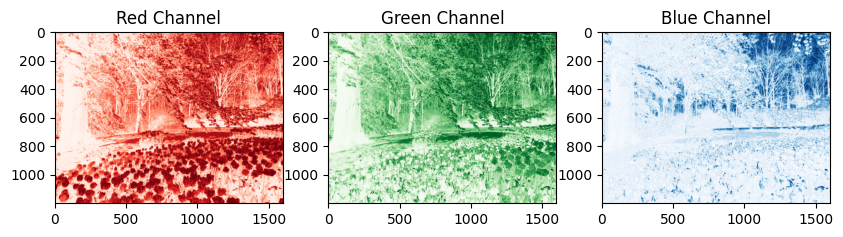

In [3]:
def extract_channels(image):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    return red_channel, green_channel, blue_channel

red, green, blue = extract_channels(image)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title("Blue Channel")

plt.show()


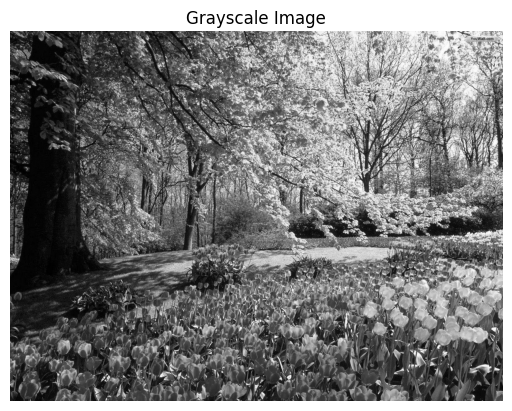

In [4]:
def convert_to_grayscale(image):
    grayscale = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    return grayscale.astype(np.uint8)

grayscale_image = convert_to_grayscale(image)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


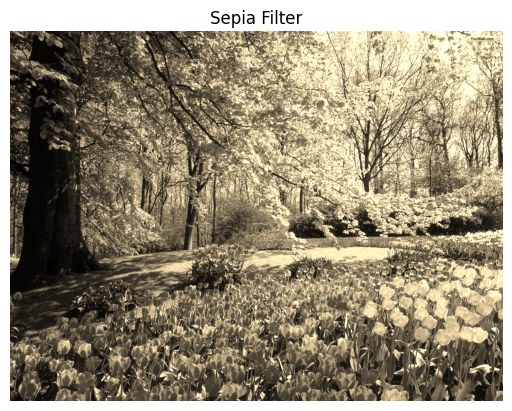

In [5]:
def apply_sepia(image):
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])

    sepia_image = np.dot(image[..., :3], sepia_matrix.T)
    return np.clip(sepia_image, 0, 255).astype(np.uint8)

sepia_image = apply_sepia(image)
plt.imshow(sepia_image)
plt.title("Sepia Filter")
plt.axis("off")
plt.show()


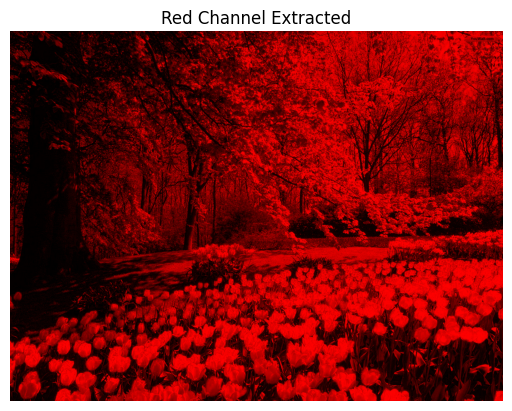

In [6]:
def extract_red_channel(image):
    red_image = np.zeros_like(image)
    red_image[:, :, 0] = image[:, :, 0]  # Keep red, remove green and blue
    return red_image

red_filtered_image = extract_red_channel(image)
plt.imshow(red_filtered_image)
plt.title("Red Channel Extracted")
plt.axis("off")
plt.show()


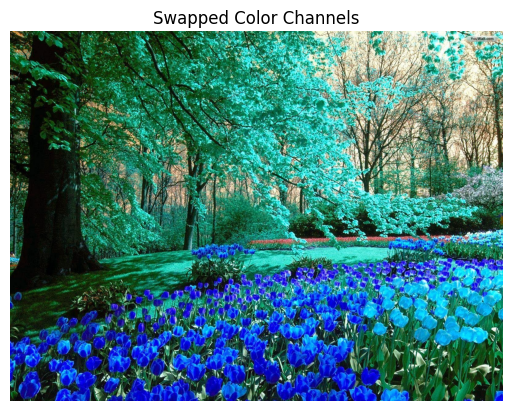

In [7]:
def swap_color_channels(image):
    return image[:, :, [2, 1, 0]]  # Swap Red and Blue

swapped_image = swap_color_channels(image)
plt.imshow(swapped_image)
plt.title("Swapped Color Channels")
plt.axis("off")
plt.show()


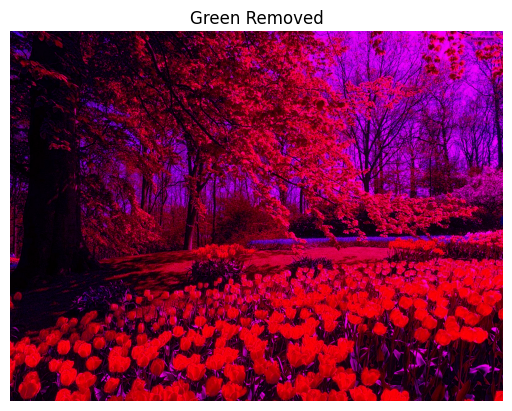

In [8]:
def remove_green(image):
    new_image = image.copy()
    new_image[:, :, 1] = 0  # Set green channel to zero
    return new_image

no_green_image = remove_green(image)
plt.imshow(no_green_image)
plt.title("Green Removed")
plt.axis("off")
plt.show()


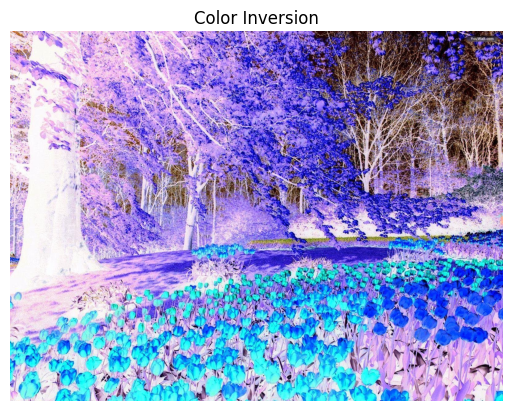

In [9]:
def invert_colors(image):
    return 255 - image  # Invert pixel values

inverted_image = invert_colors(image)
plt.imshow(inverted_image)
plt.title("Color Inversion")
plt.axis("off")
plt.show()


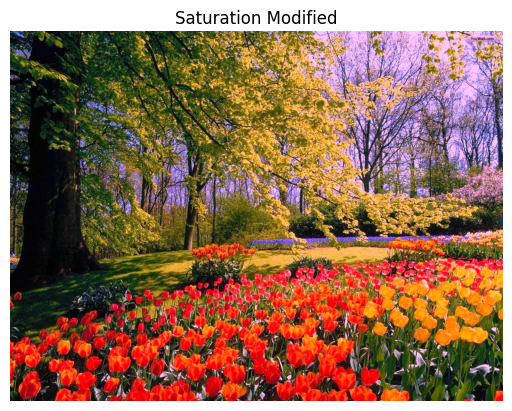

In [10]:
def modify_saturation(image, red_factor=1.2, blue_factor=1.2, green_factor=0.8):
    new_image = image.copy()
    new_image[:, :, 0] = np.clip(image[:, :, 0] * red_factor, 0, 255)  # Increase red
    new_image[:, :, 1] = np.clip(image[:, :, 1] * green_factor, 0, 255)  # Decrease green
    new_image[:, :, 2] = np.clip(image[:, :, 2] * blue_factor, 0, 255)  # Increase blue
    return new_image.astype(np.uint8)

saturated_image = modify_saturation(image)
plt.imshow(saturated_image)
plt.title("Saturation Modified")
plt.axis("off")
plt.show()


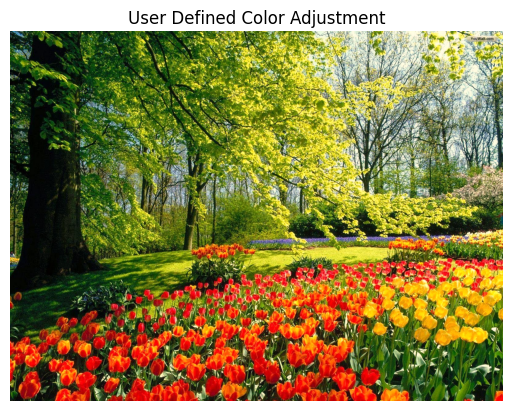

In [11]:
def user_defined_adjustment(image, r_adj=1.1, g_adj=1.0, b_adj=0.9):
    new_image = image.copy()
    new_image[:, :, 0] = np.clip(image[:, :, 0] * r_adj, 0, 255)
    new_image[:, :, 1] = np.clip(image[:, :, 1] * g_adj, 0, 255)
    new_image[:, :, 2] = np.clip(image[:, :, 2] * b_adj, 0, 255)
    return new_image.astype(np.uint8)

adjusted_image = user_defined_adjustment(image)
plt.imshow(adjusted_image)
plt.title("User Defined Color Adjustment")
plt.axis("off")
plt.show()


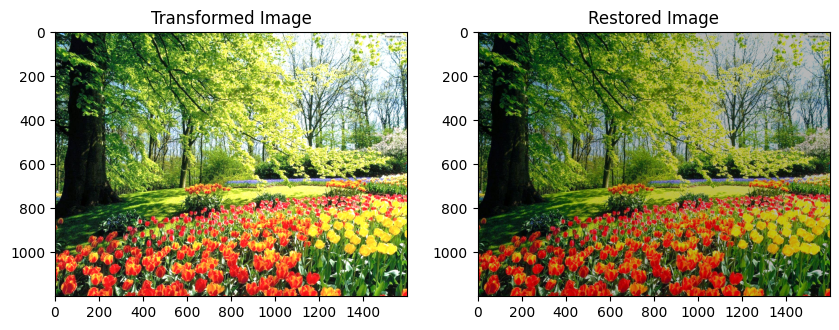

In [12]:
def apply_transformation(image, matrix):
    return np.clip(np.dot(image[..., :3], matrix.T), 0, 255).astype(np.uint8)

def apply_inverse_transformation(image, matrix):
    inverse_matrix = np.linalg.inv(matrix)
    return apply_transformation(image, inverse_matrix)

transformation_matrix = np.array([[1.2, 0.1, 0.1], [0.1, 1.2, 0.1], [0.1, 0.1, 1.2]])
transformed_image = apply_transformation(image, transformation_matrix)
restored_image = apply_inverse_transformation(transformed_image, transformation_matrix)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(transformed_image)
plt.title("Transformed Image")

plt.subplot(1, 2, 2)
plt.imshow(restored_image)
plt.title("Restored Image")

plt.show()


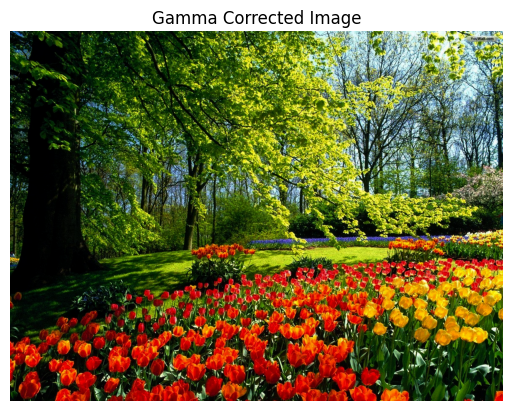

In [13]:
def gamma_correction(image, gamma):
    gamma_corrected = 255 * (image / 255) ** gamma
    return np.clip(gamma_corrected, 0, 255).astype(np.uint8)

gamma_image = gamma_correction(image, 1.5)
plt.imshow(gamma_image)
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()
